In [1]:
import numpy as np
import torch
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import ToTensor

In [2]:
dataset = MNIST(root='.', train=True, download=True, transform=ToTensor())

# Filter all the '5's
indices = [i for i, (img, label) in enumerate(dataset) if label == 5]

# DataLoader for the '5's, with batch size set to 2 for pairing
loader = DataLoader(dataset, batch_size=2, sampler=torch.utils.data.SubsetRandomSampler(indices))

# Extract pairs
pairs = []
for images, labels in loader:
    if images.shape[0] >= 2:  # Check if there are at least 2 images in the batch
        pairs.append([images[0][0].numpy(), images[1][0].numpy()])  # Extracting the first channel of the images


len(pairs), pairs[0][0].shape

(2710, (28, 28))

In [3]:
from skimage.transform import resize
from tqdm import tqdm

for i, batch in tqdm(enumerate(loader)):
    # Ensure batch has at least 1 pair of images
    if len(batch[0]) >= 2:
        # Pad, resize, and normalize the first image in the pair
        image1 = np.pad(np.squeeze(batch[0][0]), pad_width=((2, 2), (2, 2)), mode='constant', constant_values=0)
        image1_resized = resize(image1, (512, 512), anti_aliasing=True)
        image1_normalized = (image1_resized - np.min(image1_resized)) / (np.max(image1_resized) - np.min(image1_resized))
        np.save(f'/home-local/rudravg/registration_stress_test/512/image1_{i}.npy', image1_normalized)

        # Pad, resize, and normalize the second image in the pair
        image2 = np.pad(np.squeeze(batch[0][1]), pad_width=((2, 2), (2, 2)), mode='constant', constant_values=0)
        image2_resized = resize(image2, (512, 512), anti_aliasing=True)
        image2_normalized = (image2_resized - np.min(image2_resized)) / (np.max(image2_resized) - np.min(image2_resized))
        np.save(f'/home-local/rudravg/registration_stress_test/512/image2_{i}.npy', image2_normalized)
    else:
        print(f"Batch {i} does not contain enough images")

2711it [00:39, 68.55it/s]

Batch 2710 does not contain enough images


In [18]:
with open('/nfs2/forGaurav/yesbackup/DAPI_reg/vxl_morph/images_32/train_image_pairs_v3.txt', 'w') as f:
    for i in range(2400):
        # Construct the paths to the image pair
        image1_path = f'/nfs2/forGaurav/yesbackup/DAPI_reg/vxl_morph/images_32/image1_{i}.npy'
        image2_path = f'/nfs2/forGaurav/yesbackup/DAPI_reg/vxl_morph/images_32/image2_{i}.npy'

        # Write the paths to the file, separated by a space
        f.write(f'{image1_path} {image2_path}\n')
        #f.write(f'{image2_path}\n')
with open('/nfs2/forGaurav/yesbackup/DAPI_reg/vxl_morph/images_32/val_image_pairs_v3.txt','w') as f:
    for j in range(2400,2700):
        image1_path = f'/nfs2/forGaurav/yesbackup/DAPI_reg/vxl_morph/images_32/image1_{j}.npy'
        image2_path = f'/nfs2/forGaurav/yesbackup/DAPI_reg/vxl_morph/images_32/image2_{j}.npy'
        f.write(f'{image1_path} {image2_path}\n')
    

In [12]:
img=np.load('/home-local/rudravg/registration_stress_test/512/image1_1.npy')
img.min(), img.max(), img.shape

(0.0, 1.0, (512, 512))

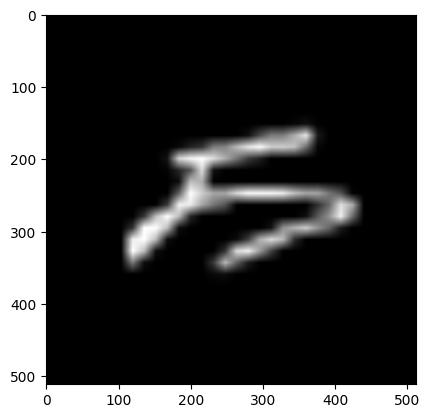

In [13]:
#plotting the image
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')
plt.show()
